In [21]:
import pandas as pd
import os

directory = 'data_lab_1'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)

In [22]:
age_bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


<Axes: xlabel='Age Group', ylabel='Impressions'>

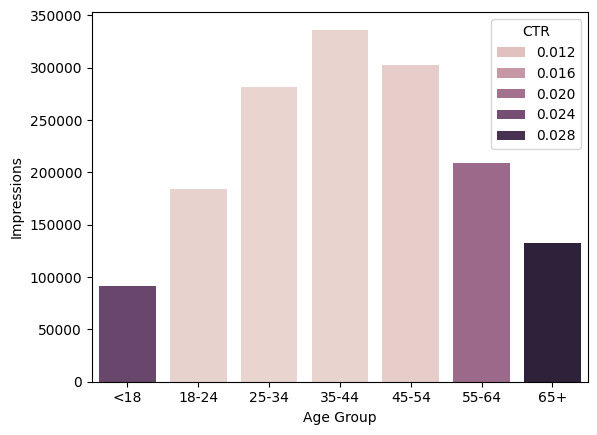

In [29]:
import seaborn as sns

df_grouped = df.groupby('Age Group', observed=False).agg({'Impressions': 'sum', 'Clicks': 'sum'})
df_grouped['CTR'] = df_grouped['Clicks'] / df_grouped['Impressions']
sns.barplot(data=df_grouped, x='Age Group', y='Impressions', hue='CTR')


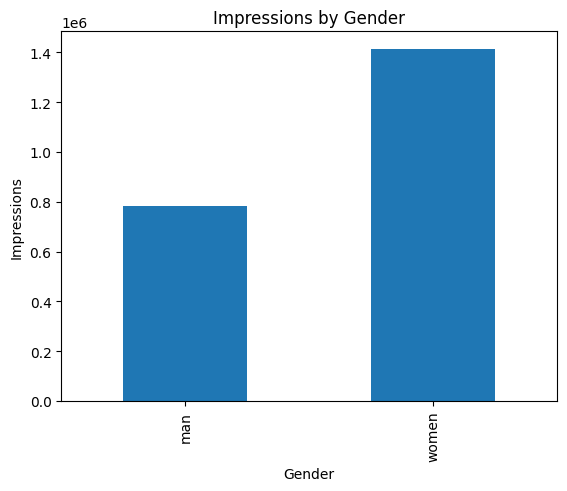

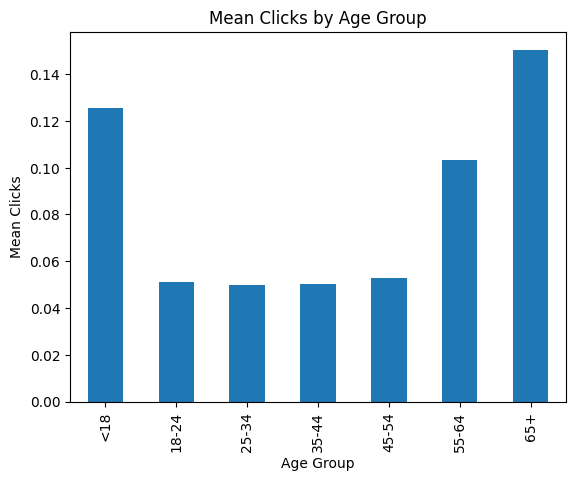

In [31]:
import matplotlib.pyplot as plt

df_gender = df.groupby('Gender', observed=False).agg({'Impressions': 'sum'})
df['Gender'] = df['Gender'].replace({0: 'women', 1: 'man'})
df_gender.plot(kind='bar', legend=False)
plt.xlabel('Gender')
plt.ylabel('Impressions')
plt.title('Impressions by Gender')
plt.show()

df_age_group = df.groupby('Age Group', observed=False).agg({'Clicks': 'mean'})
df_age_group.plot(kind='bar', legend=False)
plt.xlabel('Age Group')
plt.ylabel('Mean Clicks')
plt.title('Mean Clicks by Age Group')
plt.show()


In [65]:
df_ctr = df.groupby('Age Group', observed=False).agg({'Clicks': 'sum', 'Impressions': 'sum'})
df_ctr['CTR'] = df_ctr['Clicks'] / df_ctr['Impressions']
df_quantiles = df.groupby('Age Group', observed=False).agg({'Impressions': lambda x: x.quantile(0.75)})
df_mean = df.groupby('Age Group', observed=False).agg({'Impressions': 'mean'})
df_median = df.groupby('Age Group', observed=False).agg({'Impressions': 'median'})
df_variance = df.groupby('Age Group', observed=False).agg({'Impressions': 'var'})
df_max = df.groupby('Gender', observed=False).agg({'Age': 'max'})

result_df = pd.DataFrame({
    'Age Group': df_ctr.index,
    'Clicks': df_ctr['Clicks'],
    'Impressions': df_ctr['Impressions'],
    'CTR': df_ctr['CTR'],
    'Impressions Mean': df_mean['Impressions'],
    'Impressions Variance': df_variance['Impressions'],
    'Median Impressions': df_median['Impressions'],
    'Quantile Impressions': df_quantiles['Impressions']

})
result_df



,Age Group,Clicks,Impressions,CTR,Impressions Mean,Impressions Variance,Median Impressions,Quantile Impressions
Age Group,,,,,,,,
<18,<18,2295,91389,0.025112,4.994207,5.066312,5.0,6.0
18-24,18-24,1891,184535,0.010247,4.997021,4.995821,5.0,6.0
25-34,25-34,2805,281540,0.009963,5.015231,5.024440,5.0,6.0
35-44,35-44,3393,336357,0.010087,4.988240,4.977942,5.0,6.0
45-54,45-54,3207,302442,0.010604,4.999041,5.007784,5.0,6.0
55-64,55-64,4326,208623,0.020736,4.980020,4.967947,5.0,6.0
65+,65+,4004,132476,0.030224,4.978990,4.990952,5.0,6.0
